In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print(x_data.shape, t_data.shape)

except Exception as err:

    print(str(err))

(759, 8) (759, 1)


이항분류를 다중분류 one-hot encoding 문제로 변경

In [ ]:
# one-hot encoding 


t_data_one_hot = tf.keras.utils.to_categorical(t_data, num_classes=2)

print(t_data.shape, t_data_one_hot.shape)

(759, 1) (759, 2)


In [ ]:
# Logistic Regression 을 keras 이용하여 생성
# 다중 분류이므로 출력층은  softmax 함수 적용

model = Sequential()

# 다중 분류이므로 노드 2개인 출력층 생성
model.add(Dense(t_data_one_hot.shape[1], 
                input_shape=(x_data.shape[1],),
                activation='softmax'))  

In [ ]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data_one_hot, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
19/19 - 3s - loss: 0.6310 - accuracy: 0.6507 - val_loss: 0.6107 - val_accuracy: 0.6579
Epoch 2/500
19/19 - 0s - loss: 0.6215 - accuracy: 0.6590 - val_loss: 0.6028 - val_accuracy: 0.6645
Epoch 3/500
19/19 - 0s - loss: 0.6145 - accuracy: 0.6623 - val_loss: 0.5969 - val_accuracy: 0.6974
Epoch 4/500
19/19 - 0s - loss: 0.6090 - accuracy: 0.6722 - val_loss: 0.5921 - val_accuracy: 0.7039
Epoch 5/500
19/19 - 0s - loss: 0.6045 - accuracy: 0.6656 - val_loss: 0.5885 - val_accuracy: 0.7105
Epoch 6/500
19/19 - 0s - loss: 0.6009 - accuracy: 0.6672 - val_loss: 0.5855 - val_accuracy: 0.7105
Epoch 7/500
19/19 - 0s - loss: 0.5978 - accuracy: 0.6689 - val_loss: 0.5829 - val_accuracy: 0.7039
Epoch 8/500
19/19 - 0s - loss: 0.5950 - accuracy: 0.6689 - val_loss: 0.5806 - val_accuracy: 0.6974
Epoch 9/500
19/19 - 0s - loss: 0.5925 - accuracy: 0.6722 - val_loss: 0.5786 - val_accuracy: 0.6974
Epoch 10/500
19/19 - 0s - loss: 0.5903 - accuracy: 0.6705 - val_loss: 0.5768 - val_accuracy: 0.6842
Epoch 11/

In [ ]:
model.evaluate(x_data, t_data_one_hot)

24/24 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.7734


[0.47480952739715576, 0.7733860611915588]

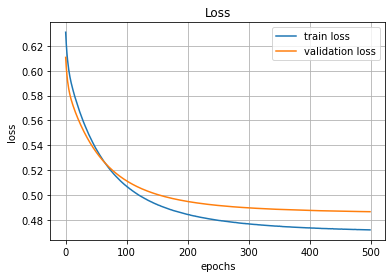

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

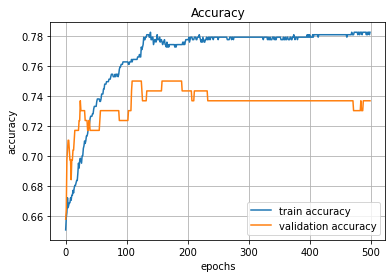

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()